In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pyperclip
import time
import warnings
import pandas as pd
warnings.filterwarnings(action = 'ignore')

driver = webdriver.Chrome('경로위치/chromedriver')
driver.get('https://naver.com')
time.sleep(1)

In [2]:
def never_searching(keyword):
    url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=' + keyword
    return url

keyword = '전시회'
url= never_searching(keyword)
driver.get(url)

<html data-platform="macintel" data-useragent="mozilla/5.0 (macintosh; intel mac os x 10_15_7) applewebkit/537.36 (khtml, like gecko) chrome/110.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="전시회 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'전시회'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'전시회'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>전시회 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="
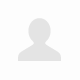
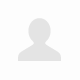

In [3]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

print(soup)

In [4]:
ex_im = soup.select('div.data_area')


title = ex_im[0].select('div.title')[0].text.strip()
period = ex_im[0].select('div.info>dl.info_group>dd.no_ellip')[0].text.strip()
location = ex_im[0].select('div.info>dl.info_group>dd.no_ellip')[1].text.strip()


print(title,period,location)

조선의 백자, 군자지향 君子志向 2023.02.28.~2023.05.28. 리움미술관


In [5]:
# 반복문으로 가져오기
title_list_1 = []
for i in range(0,3):
    ex_im = soup.select('div.data_area')
    title_1 = ex_im[i].select('div.area_text_box > strong.this_text')[0].text.strip()
    title_list_1.append(title_1)
    
title_list_1

['조선의 백자, 군자지향 君子志向', '김윤신 : 더하고 나누며, 하나', '오늘부터의 세계']

In [6]:
# 반복문으로 가져오기
period_list_1 = []
for i in range(0,3):
    ex_im = soup.select('div.data_area')
    period_1 = ex_im[0].select('div.info>dl.info_group>dd.no_ellip')[0].text.strip()
    period_list_1.append(period_1)
    
period_list_1

['2023.02.28.~2023.05.28.',
 '2023.02.28.~2023.05.28.',
 '2023.02.28.~2023.05.28.']

In [7]:
# 반복문으로 가져오기
location_list_1 = []
for i in range(0,3):
    ex_im = soup.select('div.data_area')
    location_1 = ex_im[i].select('div.info>dl.info_group>dd.no_ellip')[1].text.strip()
    location_list_1.append(location_1)
    
location_list_1

['리움미술관', '서울시립 남서울미술관', 'KF갤러리']

In [8]:
d_2 = pd.DataFrame(zip(title_list_1,period_list_1,location_list_1),columns = ["제목","기간","장소"])
d_2

,제목,기간,장소
0,"조선의 백자, 군자지향 君子志向",2023.02.28.~2023.05.28.,리움미술관
1,"김윤신 : 더하고 나누며, 하나",2023.02.28.~2023.05.28.,서울시립 남서울미술관
2,오늘부터의 세계,2023.02.28.~2023.05.28.,KF갤러리


In [9]:
all_data = []
def get_ex_important(driver) :
    
    # 현재 페이지 HTML 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    title_list = []
    for i in range(0,3):
        ex_im = soup.select('div.data_area')
        title = ex_im[i].select('div.area_text_box>strong.this_text')[0].text.strip()
        title_list.append(title)
        
    period_list = []
    for i in range(0,3):
        ex_im = soup.select('div.data_area')
        period = ex_im[0].select('div.info>dl.info_group>dd.no_ellip')[0].text.strip()
        period_list.append(period)
        
    location_list = []
    for i in range(0,3):
        ex_im = soup.select('div.data_area')
        location = ex_im[i].select('div.info>dl.info_group>dd.no_ellip')[1].text.strip()
        location_list.append(location)
        
    df = pd.DataFrame(zip(title_list,period_list,location_list),columns = ["제목","기간","장소"])
    all_data.append(df)
        
    return all_data

In [10]:
import time

def move_next(driver) :
    
    try:
        right = driver.find_element(By.CLASS_NAME,'pg_next.on')
    except:
        right = driver.find_element(By.CLASS_NAME,'pg_next')
    
    right.click()
    time.sleep(3)

In [11]:
move_next(driver)

# 전체 페이지 가져오기

In [12]:
# 전체 페이지 가져오기

from selenium import webdriver
from bs4 import BeautifulSoup
from tqdm import tqdm
import time
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

driver = webdriver.Chrome('경로위치/chromedriver')
driver.get('https://naver.com')

driver.implicitly_wait(3)


def never_searching(keyword):
    url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=' + keyword
    return url

keyword = '전시회'
url= never_searching(keyword)
driver.get(url)

results = []

target = 111

for i in range(target) :
    try:
        data = get_ex_important(driver)
        results.append(data)
        move_next(driver)
        
    except :
        time.sleep(0.1)
        move_next(driver)
        
    df_dd = pd.concat(all_data)
    
df_dd.to_excel('never_ex_{}_2023_1_result.xlsx'.format(keyword),index=False)

driver.close()

In [13]:
Ex_2023 = pd.read_excel('never_ex_전시회_2023_1_result.xlsx')
Ex_2023.head()

,제목,기간,장소
0,"조선의 백자, 군자지향 君子志向",2023.02.28.~2023.05.28.,리움미술관
1,"김윤신 : 더하고 나누며, 하나",2023.02.28.~2023.05.28.,서울시립 남서울미술관
2,오늘부터의 세계,2023.02.28.~2023.05.28.,KF갤러리
3,김효선 : Something In Between ; From Aesthetic Di...,2023.03.01.~2023.04.07.,정향재
4,2nd NEW CLASSIC : 시작은 빛,2023.03.01.~2023.04.07.,KT&G 상상마당


In [14]:
Ex_2023.tail()

,제목,기간,장소
322,Kingscribbler : THE SCRIBBLED LINE IS LIFE,2023.02.16.~2023.03.05.,로이갤러리 압구정
323,This is Fashion Photography,2023.02.16.~2023.03.05.,캐논갤러리
324,공과예 - 현대도예 앞에 서다,2023.02.07.~2023.03.05.,용산공예관
325,우리 이제 만나요,2023.02.07.~2023.03.05.,국립민속박물관
326,제12회 부산국제화랑아트페어,2023.02.07.~2023.03.05.,BEXCO


In [15]:
Ex_2023.shape

(327, 3)

In [16]:
Ex_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      327 non-null    object
 1   기간      327 non-null    object
 2   장소      327 non-null    object
dtypes: object(3)
memory usage: 7.8+ KB


In [17]:
Ex_2023.isnull().sum()

제목    0
기간    0
장소    0
dtype: int64

In [18]:
Ex_2023.duplicated().sum()

0

In [19]:
Ex_2023.shape

(327, 3)